In [12]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
img = cv2.imread('umbrella.jpg') 

# Step 3: Display using matplotlib
cv2.imshow("clorful image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 2.
import numpy as np

if img is None:
    raise FileNotFoundError("Image not found!")

def rotate_image(image, angle=90):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def resize_image(image, width=1, height=1):
    return cv2.resize(image, None, fx=width, fy=height, interpolation=cv2.INTER_LINEAR)

def perspective_transform(image):
    h, w = image.shape[:2]
    src_pts = np.float32([[0, 0], [w - 1, 0], [0, h - 1], [w - 1, h - 1]])
    dst_pts = np.float32([[50, 50], [w - 100, 30], [30, h - 50], [w - 50, h - 30]])
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    return cv2.warpPerspective(image, M, (w, h))

# Menu loop
while True:
    print("\nOptions:")
    print("1. Rotate")
    print("2. Resize")
    print("3. Perspective Transform")
    print("4. Exit")
    
    choice = input("Choose an option (1-4): ")
    
    if choice == '1':
        angle = float(input("Enter rotation angle (e.g., 90): "))
        img = rotate_image(img, angle)
        cv2.imshow("Rotated Image", img)

    elif choice == '2':
        width = float(input("Enter resize width (e.g., 0.5 for 50%): "))
        height = float(input("Enter resize height (e.g., 0.5 for 50%): "))
        img = resize_image(img, width, height)
        cv2.imshow("Resized Image", img)

    elif choice == '3':
        height, width = img.shape[:2]
        H = np.array([
            [0.4, -0.4, 190],
            [0.15, 0.4, 100],
            [0, 0, 1]
        ], dtype=np.float32)
        warped_img = cv2.warpPerspective(img, H, (width, height))

        cv2.imshow("Perspective Transformed", warped_img)

    elif choice == '4':
        print("Exiting...")
        break

    else:
        print("Invalid choice. Try again.")

    cv2.waitKey(0)
    cv2.destroyAllWindows()



Options:
1. Rotate
2. Resize
3. Perspective Transform
4. Exit

Options:
1. Rotate
2. Resize
3. Perspective Transform
4. Exit
Exiting...


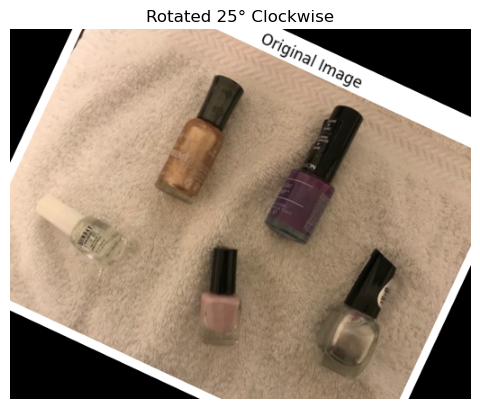

In [10]:
import matplotlib.pyplot as plt

# Convert BGR to RGB for matplotlib
rotated_25_rgb = cv2.cvtColor(rotated_25, cv2.COLOR_BGR2RGB)

# Display the rotated image
plt.imshow(rotated_25_rgb)
plt.title("Rotated 25° Clockwise")
plt.axis("off")
plt.show()


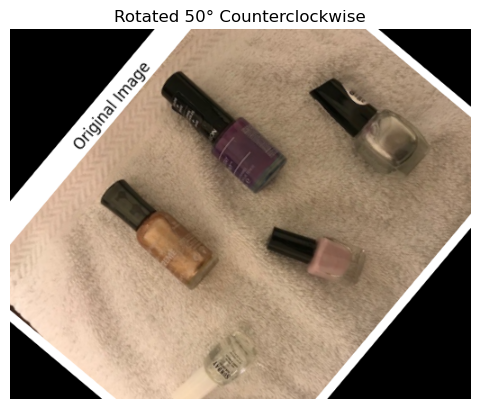

In [12]:
# Get image height and width
(h, w) = img.shape[:2]
center = (w // 2, h // 2)

# Create rotation matrix for 50 degrees counterclockwise
M = cv2.getRotationMatrix2D(center, 50, 1.0)

# Apply the rotation
rotated_50 = cv2.warpAffine(img, M, (w, h))

# Save the rotated image
cv2.imwrite('rotated_50_counterclockwise.jpg', rotated_50)

# Convert to RGB for display in matplotlib
rotated_rgb = cv2.cvtColor(rotated_50, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(rotated_rgb)
plt.title("Rotated 50° Counterclockwise")
plt.axis("off")
plt.show()

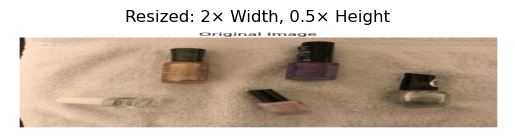

In [13]:
#Resizing
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('nail polish.jpg')

# Resize image: fx = 2.0 (double width), fy = 0.5 (half height)
resized = cv2.resize(img, None, fx=2.0, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Save the resized image
cv2.imwrite('resized_2x_width_05x_height.jpg', resized)

# Convert to RGB for display in matplotlib
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

# Display the resized image
plt.imshow(resized_rgb)
plt.title("Resized: 2× Width, 0.5× Height")
plt.axis("off")
plt.show()


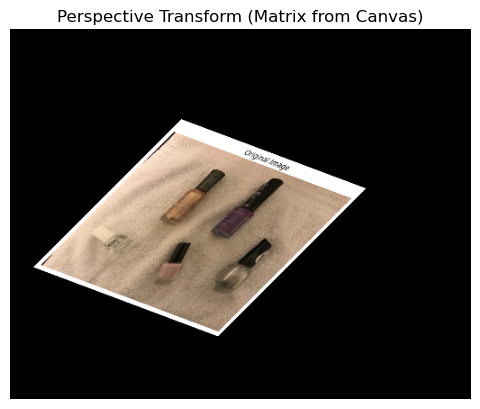

'perspective_transform_matrix.jpg'

In [17]:
#perspective transformation 
# Reload the original image
img = cv2.imread("nail polish.jpg")
(h, w) = img.shape[:2]

# Use the newly defined matrix from canvas
H_canvas = np.float32([
    [0.4, -0.4, 190],
    [0.15, 0.4, 100],
    [0.0, 0.0, 1.0]
])

# Apply perspective transform using this matrix
canvas_perspective = cv2.warpPerspective(img, H_canvas, (w, h))

# Save the output
canvas_output_path = "perspective_transform_matrix.jpg"
cv2.imwrite(canvas_output_path, canvas_perspective)

# Display the result
canvas_rgb = cv2.cvtColor(canvas_perspective, cv2.COLOR_BGR2RGB)
plt.imshow(canvas_rgb)
plt.title("Perspective Transform (Matrix from Canvas)")
plt.axis("off")
plt.show()

canvas_output_path


